In [30]:
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [16]:
data_path = "data/"
for file in os.listdir(data_path):
    df = pd.read_csv(data_path + file, index_col=0)

In [17]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-07-01 00:00:00+05:30,18.037859,18.321716,17.612072,17.831417,2047540,0.0,0.0
2002-07-02 00:00:00+05:30,18.063668,19.611983,17.908837,18.979755,5546354,0.0,0.0
2002-07-03 00:00:00+05:30,18.966849,19.999059,18.908788,19.934546,5745267,0.0,0.0
2002-07-04 00:00:00+05:30,19.999055,20.437744,19.186191,19.437792,3896601,0.0,0.0
2002-07-05 00:00:00+05:30,19.224898,19.773260,19.121678,19.637783,3261038,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-02 00:00:00+05:30,1239.000000,1239.199951,1222.500000,1229.949951,12516759,0.0,0.0
2024-09-03 00:00:00+05:30,1227.199951,1250.949951,1220.400024,1247.699951,19114907,0.0,0.0
2024-09-04 00:00:00+05:30,1239.849976,1243.699951,1232.800049,1236.349976,13505843,0.0,0.0


In [18]:
df.index

Index(['2002-07-01 00:00:00+05:30', '2002-07-02 00:00:00+05:30',
       '2002-07-03 00:00:00+05:30', '2002-07-04 00:00:00+05:30',
       '2002-07-05 00:00:00+05:30', '2002-07-08 00:00:00+05:30',
       '2002-07-09 00:00:00+05:30', '2002-07-10 00:00:00+05:30',
       '2002-07-11 00:00:00+05:30', '2002-07-12 00:00:00+05:30',
       ...
       '2024-08-26 00:00:00+05:30', '2024-08-27 00:00:00+05:30',
       '2024-08-28 00:00:00+05:30', '2024-08-29 00:00:00+05:30',
       '2024-08-30 00:00:00+05:30', '2024-09-02 00:00:00+05:30',
       '2024-09-03 00:00:00+05:30', '2024-09-04 00:00:00+05:30',
       '2024-09-05 00:00:00+05:30', '2024-09-06 00:00:00+05:30'],
      dtype='object', name='Date', length=5508)

<Axes: xlabel='Date'>

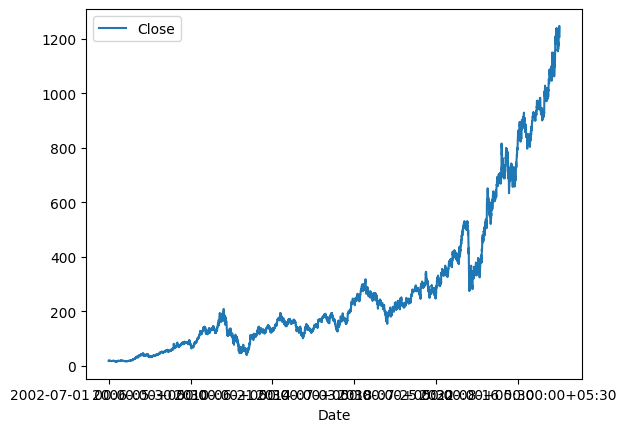

In [19]:
df.plot.line(y="Close", use_index=True)

In [20]:
del df['Dividends']
del df['Stock Splits']

In [21]:
df['Tomorrow'] = df['Close'].shift(-1)

In [22]:
df

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2002-07-01 00:00:00+05:30,18.037859,18.321716,17.612072,17.831417,2047540,18.979755
2002-07-02 00:00:00+05:30,18.063668,19.611983,17.908837,18.979755,5546354,19.934546
2002-07-03 00:00:00+05:30,18.966849,19.999059,18.908788,19.934546,5745267,19.437792
2002-07-04 00:00:00+05:30,19.999055,20.437744,19.186191,19.437792,3896601,19.637783
2002-07-05 00:00:00+05:30,19.224898,19.773260,19.121678,19.637783,3261038,19.334566
...,...,...,...,...,...,...
2024-09-02 00:00:00+05:30,1239.000000,1239.199951,1222.500000,1229.949951,12516759,1247.699951
2024-09-03 00:00:00+05:30,1227.199951,1250.949951,1220.400024,1247.699951,19114907,1236.349976
2024-09-04 00:00:00+05:30,1239.849976,1243.699951,1232.800049,1236.349976,13505843,1235.949951


In [23]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [24]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2002-07-01 00:00:00+05:30,18.037859,18.321716,17.612072,17.831417,2047540,18.979755,1
2002-07-02 00:00:00+05:30,18.063668,19.611983,17.908837,18.979755,5546354,19.934546,1
2002-07-03 00:00:00+05:30,18.966849,19.999059,18.908788,19.934546,5745267,19.437792,0
2002-07-04 00:00:00+05:30,19.999055,20.437744,19.186191,19.437792,3896601,19.637783,1
2002-07-05 00:00:00+05:30,19.224898,19.773260,19.121678,19.637783,3261038,19.334566,0
...,...,...,...,...,...,...,...
2024-09-02 00:00:00+05:30,1239.000000,1239.199951,1222.500000,1229.949951,12516759,1247.699951,1
2024-09-03 00:00:00+05:30,1227.199951,1250.949951,1220.400024,1247.699951,19114907,1236.349976,0
2024-09-04 00:00:00+05:30,1239.849976,1243.699951,1232.800049,1236.349976,13505843,1235.949951,0


In [29]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "High", "Low", "Open"]
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [31]:
preds = model.predict(test[predictors])

In [33]:
preds = pd.Series(preds, index=test.index)

In [34]:
precision_score(test['Target'], preds)

np.float64(0.7777777777777778)

In [35]:
combined = pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

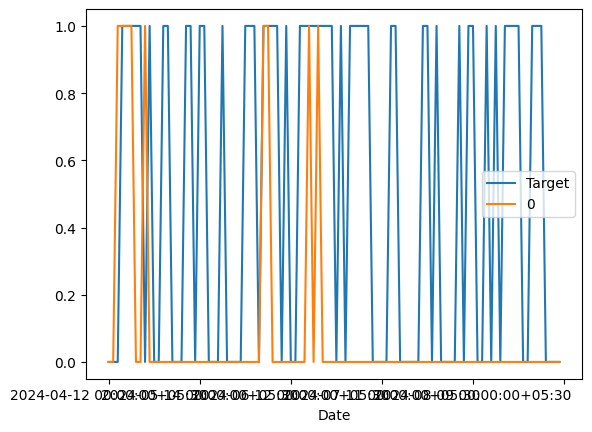

In [36]:
combined.plot()

In [37]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [40]:
predictions = backtest(df, model, predictors)

In [41]:
predictions["Predictions"].value_counts()

Predictions
0    2130
1     878
Name: count, dtype: int64

In [42]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5125284738041003)

In [43]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.505319
0    0.494681
Name: count, dtype: float64

In [44]:
#Adding addiotional features
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages =df.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df['Close'] / rolling_averages['Close']

    trend_column = f"Close_Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]
    

In [45]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Trend_2,Close_Ratio_5,Close_Trend_5,Close_Ratio_60,Close_Trend_60,Close_Ratio_250,Close_Trend_250,Close_Ratio_1000,Close_Trend_1000
Date,,,,,,,,,,,,,,,,,
2002-07-01 00:00:00+05:30,18.037859,18.321716,17.612072,17.831417,2047540,18.979755,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-02 00:00:00+05:30,18.063668,19.611983,17.908837,18.979755,5546354,19.934546,1,1.031195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-03 00:00:00+05:30,18.966849,19.999059,18.908788,19.934546,5745267,19.437792,0,1.024536,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-04 00:00:00+05:30,19.999055,20.437744,19.186191,19.437792,3896601,19.637783,1,0.987383,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-07-05 00:00:00+05:30,19.224898,19.773260,19.121678,19.637783,3261038,19.334566,0,1.005118,1.0,1.024709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-02 00:00:00+05:30,1239.000000,1239.199951,1222.500000,1229.949951,12516759,1247.699951,1,1.000305,2.0,1.003017,3.0,1.037617,34.0,1.168271,134.0,1.542556,534.0
2024-09-03 00:00:00+05:30,1227.199951,1250.949951,1220.400024,1247.699951,19114907,1236.349976,0,1.007164,2.0,1.013962,3.0,1.050424,34.0,1.183840,134.0,1.563072,534.0
2024-09-04 00:00:00+05:30,1239.849976,1243.699951,1232.800049,1236.349976,13505843,1235.949951,0,0.995431,1.0,1.002701,3.0,1.039057,33.0,1.171851,133.0,1.547158,533.0


In [46]:
df = df.dropna()

In [47]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Trend_2,Close_Ratio_5,Close_Trend_5,Close_Ratio_60,Close_Trend_60,Close_Ratio_250,Close_Trend_250,Close_Ratio_1000,Close_Trend_1000
Date,,,,,,,,,,,,,,,,,
2006-05-30 00:00:00+05:30,81.229799,81.300510,79.221681,80.593422,2842136,76.011505,0,1.000527,2.0,1.006606,3.0,0.950097,33.0,1.061275,135.0,1.878605,503.0
2006-05-31 00:00:00+05:30,80.423710,80.423710,74.950877,76.011505,7296789,75.558983,0,0.970742,1.0,0.960027,3.0,0.898055,32.0,0.999866,134.0,1.769450,502.0
2006-06-01 00:00:00+05:30,76.647893,77.920641,75.113517,75.558983,4351248,78.054977,1,0.997014,0.0,0.962790,3.0,0.894854,31.0,0.992867,134.0,1.756641,501.0
2006-06-02 00:00:00+05:30,75.233713,78.344881,74.950876,78.054977,3278225,76.096352,0,1.016248,1.0,0.998842,3.0,0.925961,32.0,1.024381,135.0,1.812200,502.0
2006-06-05 00:00:00+05:30,78.203461,78.769128,74.950872,76.096352,3347795,76.746872,1,0.987294,1.0,0.984900,2.0,0.904629,31.0,0.997548,134.0,1.764413,501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30 00:00:00+05:30,1230.000000,1235.550049,1218.900024,1229.199951,21211148,1229.949951,1,1.002978,1.0,1.005135,3.0,1.038895,34.0,1.168764,134.0,1.543322,533.0
2024-09-02 00:00:00+05:30,1239.000000,1239.199951,1222.500000,1229.949951,12516759,1247.699951,1,1.000305,2.0,1.003017,3.0,1.037617,34.0,1.168271,134.0,1.542556,534.0
2024-09-03 00:00:00+05:30,1227.199951,1250.949951,1220.400024,1247.699951,19114907,1236.349976,0,1.007164,2.0,1.013962,3.0,1.050424,34.0,1.183840,134.0,1.563072,534.0


In [48]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [49]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [50]:
predictions = backtest(df, model, new_predictors)

In [51]:
predictions["Predictions"].value_counts()

Predictions
0.0    1853
1.0     154
Name: count, dtype: int64

In [52]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.474025974025974)